In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
filepath = r"C:\Primo\ML\Dataset\iris.csv"
iris_data = pd.read_csv(filepath)

In [4]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dfilepath = r"C:\Primo\ML\Dataset\diabetes.csv"
diabetes_data = pd.read_csv(dfilepath)

## Data Exploration

In [13]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
diabetes_data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
500,2,117,90,19,71,25.2,0.313,21,0
221,2,158,90,0,0,31.6,0.805,66,1
322,0,124,70,20,0,27.4,0.254,36,1
640,0,102,86,17,105,29.3,0.695,27,0
492,4,99,68,38,0,32.8,0.145,33,0


In [25]:
# count the number for each category
diabetes_data['Outcome'].value_counts()

# or

diabetes_data.groupby('Outcome').size()

Outcome
0    500
1    268
Name: count, dtype: int64

In [34]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
diabetes_data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [60]:
#checking the corrolation in the dataset
# dont use spearman when n < 30, spearman is not effective with handling outliers

correlations = diabetes_data.corr()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

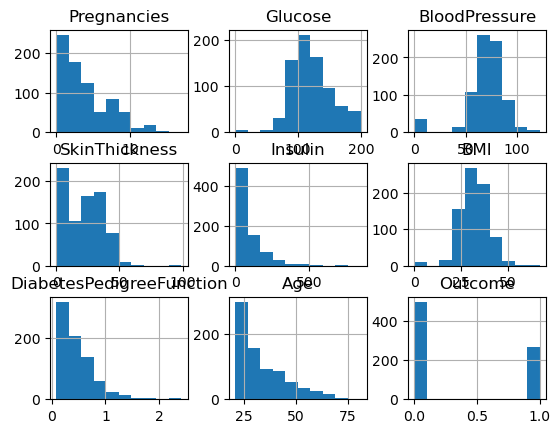

In [40]:
# put our dataset on a histogram
diabetes_data.hist()
plt.show()

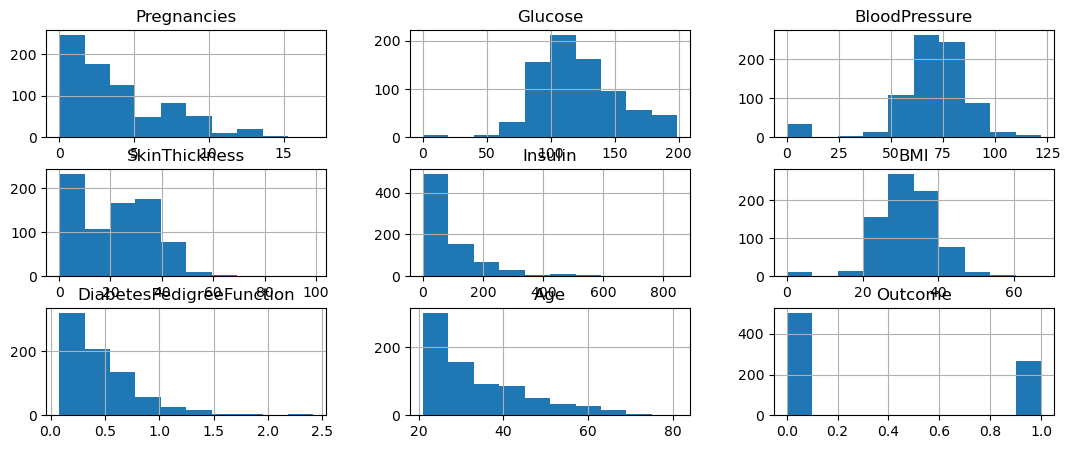

In [54]:
# resize the figure, (x-axis, y-axis)

diabetes_data.hist(figsize=(13,5))
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

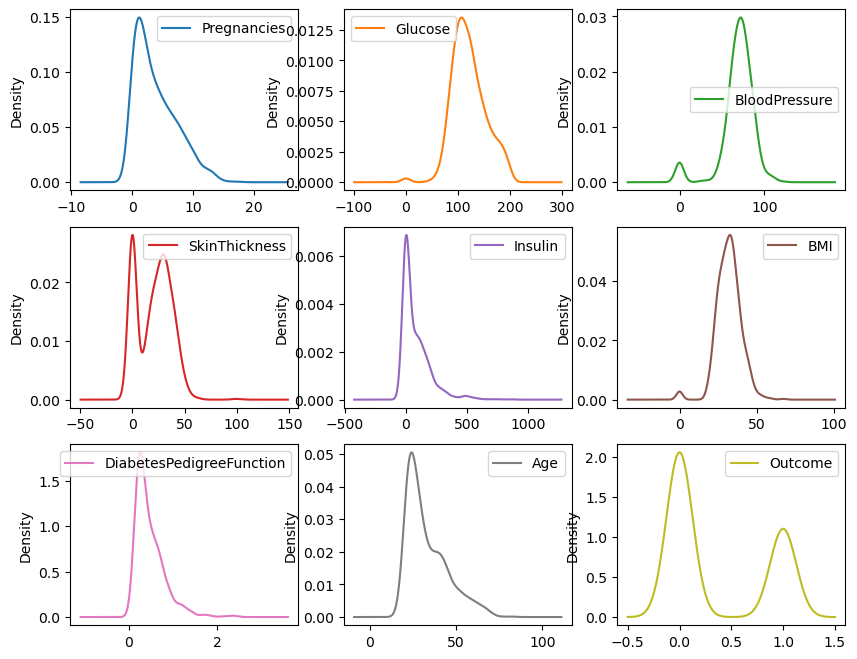

In [51]:
# Plot density plot
diabetes_data.plot(kind='density', subplots=True, figsize=(10,8), layout=(3,3), sharex=False)

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

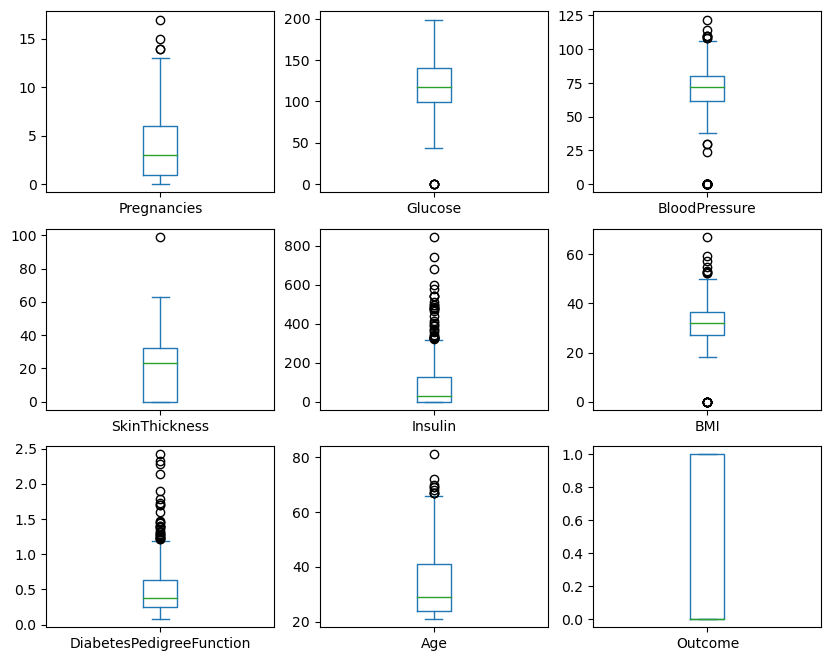

In [59]:
# Box plot - helps us easily identify outliers

diabetes_data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(10,8))

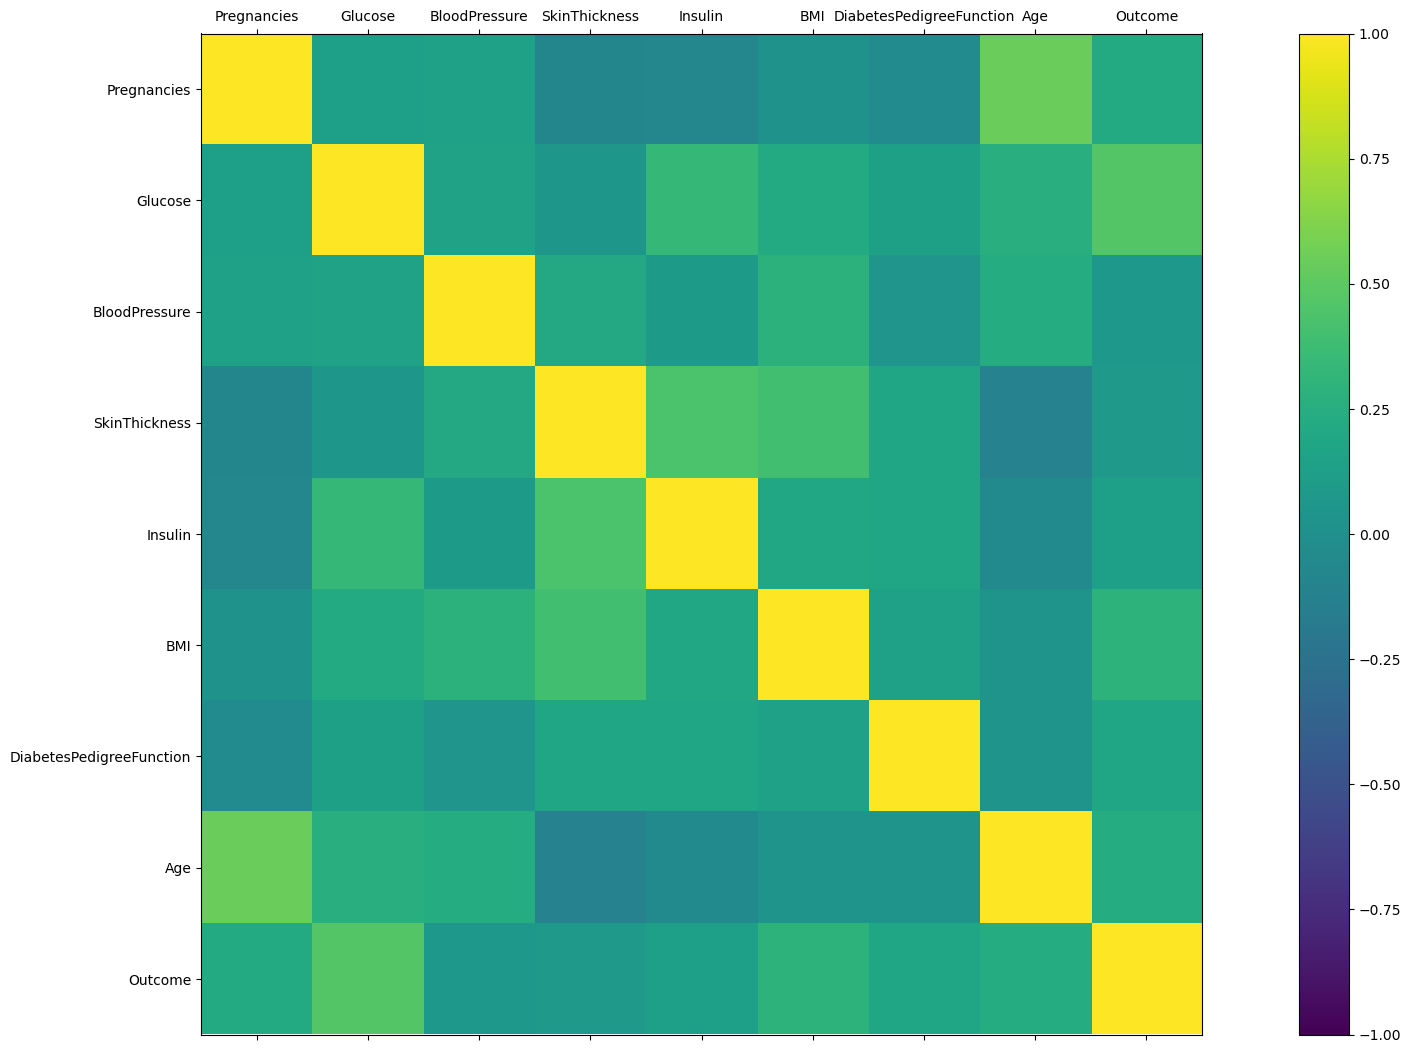

In [79]:
# Correlation Heat map plot

fig = plt.figure(figsize=(25,13))

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1) #start from 0 to 9 taking 1 steps

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(diabetes_data.columns)
ax.set_yticklabels(diabetes_data.columns)
plt.show()

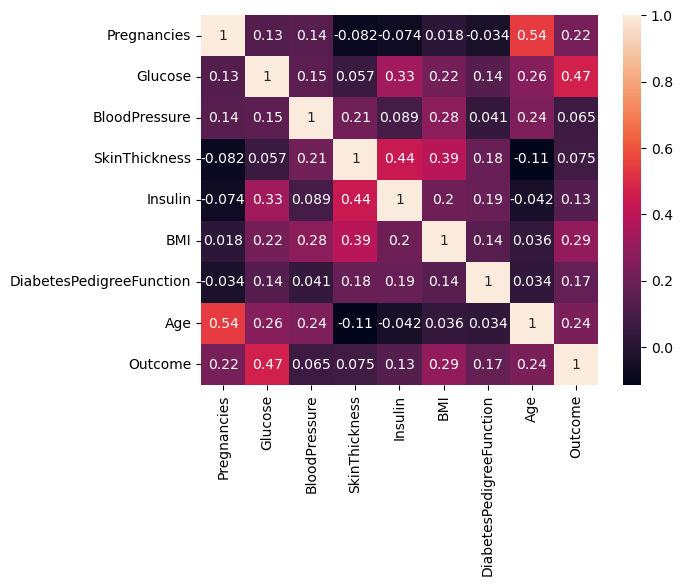

In [73]:
# using seaborn plot

sns.heatmap(data=correlations, annot=True)
plt.show()

### Using min-max scaler

In [84]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
# e.g for first data in pregnancies (6/17)*2
# min max scaler divides each value by the maximum value for that column, the multiplies the result by the upper limit of the range which is 2 in this case
scaler = MinMaxScaler(feature_range=(0,2))
diabetes_transformed = scaler.fit_transform(diabetes_data)

pd.DataFrame(diabetes_transformed, columns=diabetes_data.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.705882,1.487437,1.180328,0.707071,0.000000,1.001490,0.468830,0.966667,2.0
1,0.117647,0.854271,1.081967,0.585859,0.000000,0.792846,0.233134,0.333333,0.0
2,0.941176,1.839196,1.049180,0.000000,0.000000,0.694486,0.507259,0.366667,2.0
3,0.117647,0.894472,1.081967,0.464646,0.222222,0.837556,0.076003,0.000000,0.0
4,0.000000,1.376884,0.655738,0.707071,0.397163,1.284650,1.887276,0.400000,2.0
...,...,...,...,...,...,...,...,...,...
763,1.176471,1.015075,1.245902,0.969697,0.425532,0.980626,0.079419,1.400000,0.0
764,0.235294,1.226131,1.147541,0.545455,0.000000,1.096870,0.223740,0.200000,0.0
765,0.588235,1.216080,1.180328,0.464646,0.264775,0.780924,0.142613,0.300000,0.0
766,0.117647,1.266332,0.983607,0.000000,0.000000,0.897168,0.231426,0.866667,2.0


In [87]:
(6/17)*2

0.7058823529411765